In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

# Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60&deg; F or warmer than 100&deg; F.

In [5]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

## Initial Plot and Data Set

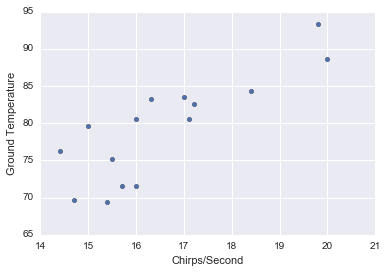

In [6]:
chirps = df['Chirps/Second'].reshape(-1,1)
#print(chirps1, chirps, temp)
temp = df['Ground Temperature']
df.plot(kind='scatter', x='Chirps/Second', y='Ground Temperature')
plt.show()

## Find the linear regression equation for this data.

In [7]:
regression = linear_model.LinearRegression()
regression.fit(chirps, temp)
print("Linear Regression coefficient is ", regression.coef_, " The intercept is ", regression.intercept_)

Linear Regression coefficient is  [ 3.410323]  The intercept is  22.8489823081


/Users/Nic/TIY/.direnv/python-3.5.1/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


## Plot of Linear Regression of Best Fit Against Data

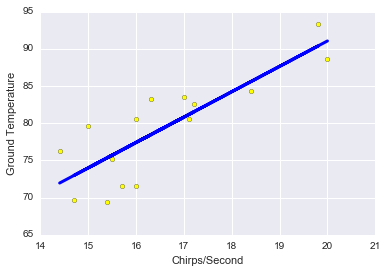

In [8]:
df.plot(kind='scatter', x='Chirps/Second', y='Ground Temperature', color='yellow')
plt.plot(chirps, regression.predict(chirps), color='blue', linewidth=3)
plt.show()

## If the ground temperature reached 95° F, then at what approximate rate would you expect the crickets to be chirping?

Linear Regression coefficient is  [ 3.410323]  The intercept is  22.8489823081 The R^^2 is  0.692294652915


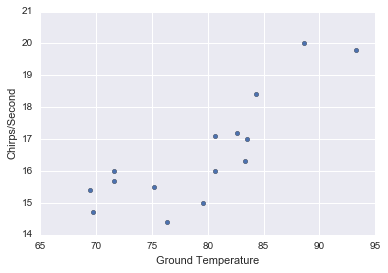

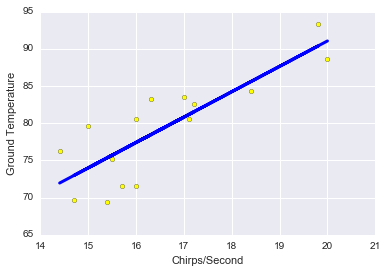

In [9]:
chirps1 = df['Chirps/Second'].reshape(-1, 1)
chirps = df['Chirps/Second'].reshape(-1,1)
#print(chirps1, chirps, temp)
temp = df['Ground Temperature'].reshape(-1, 1)
df.plot(kind='scatter', y='Chirps/Second', x='Ground Temperature')
regression1 = linear_model.LinearRegression()
regression1.fit(temp, chirps)
print("Linear Regression coefficient is ", regression.coef_, " The intercept is ", regression.intercept_, "The R^^2 is ", regression.score(chirps, temp))

df.plot(kind='scatter', x='Chirps/Second', y='Ground Temperature', color='yellow')
plt.plot(chirps, regression.predict(chirps), color='blue', linewidth=3)
plt.show()

In [10]:
print("At 95 degrees, there could be ",regression1.predict(95), " chirps")

At 95 degrees, there could be  [[ 19.74428913]]  chirps


## 18 chirps per second ground temp

In [11]:
print("The temperature at 18 chirps per second could be ", regression.predict(18), " degrees F.")

The temperature at 18 chirps per second could be  [ 84.2347963]  degrees F.


## Find the equation's  R2R2  score

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95&deg; F, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning?

# Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [12]:
df1 = pd.read_fwf("brain_body.txt")

Linear Regression coefficient is  [ 0.96649637]  The intercept is  91.0043962074 The R^^2 is  0.872662084304


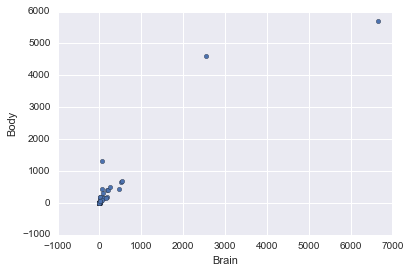

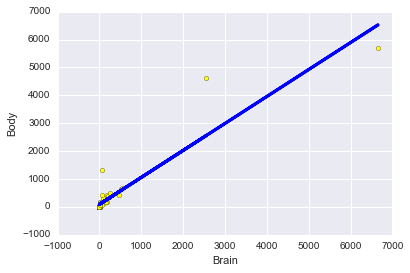

In [13]:
df1.head()
brain = df1['Brain'].reshape(-1,1)
body = df1['Body']
df1.plot(kind='scatter', x='Brain', y='Body')
regression1 = linear_model.LinearRegression()
regression1.fit(brain, body)
print("Linear Regression coefficient is ", regression1.coef_, " The intercept is ", regression1.intercept_, "The R^^2 is ", regression1.score(brain, body))
df1.plot(kind='scatter', x='Brain', y='Body', color='yellow')
plt.plot(brain, regression1.predict(brain), color='blue', linewidth=3)
plt.show()

# Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

In [14]:
df2 = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df2.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


## Data with Outliers Plots

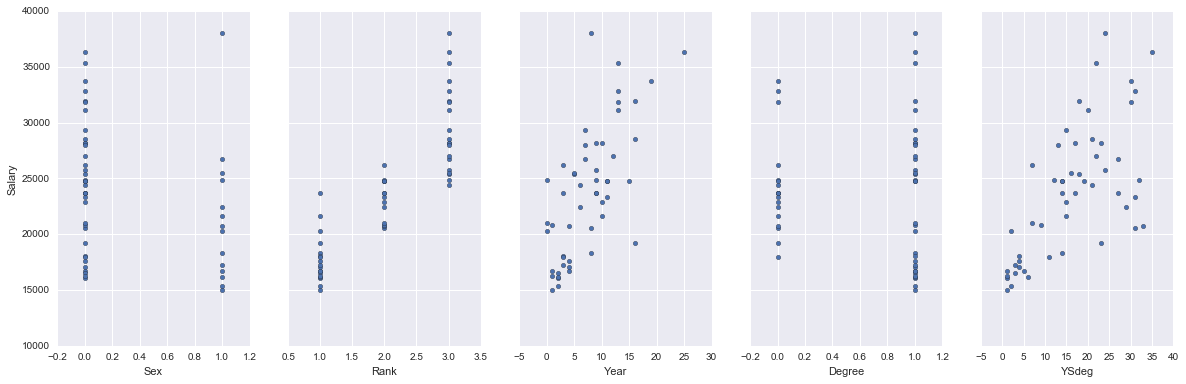

In [17]:
fig, axs = plt.subplots(1,5, sharey=True)
df2.plot(kind='scatter', x='Sex', y='Salary', ax=axs[0], figsize=(20,6))
df2.plot(kind='scatter', x='Rank', y='Salary', ax=axs[1])
df2.plot(kind='scatter', x='Year', y='Salary', ax=axs[2])
df2.plot(kind='scatter', x='Degree', y='Salary', ax=axs[3])
df2.plot(kind='scatter', x='YSdeg', y='Salary', ax=axs[4])
plt.show()

## Cleaning Out Outliers

In [18]:
#Women, removing outliers
dff = df2[df2.Sex == 1]
no_female_outliers = dff[np.abs(dff.Salary - dff.Salary.mean()) <= (2 * dff.Salary.std())]

#Dudes, removing outliers
dfm = df2[df2.Sex == 0]
no_male_outliers = dfm[np.abs(dfm.Salary - dfm.Salary.mean()) <= (2 * dfm.Salary.std())]

#Merging back together into df_new
list_of_frames = [no_male_outliers, no_female_outliers]
df_new = pd.concat(list_of_frames)

### Linear regression equation for this data using columns 1-5 to column 6.

In [19]:
######################## Merged Regression
regression10 = linear_model.LinearRegression()
feature_cols10 = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']
x10 = df_new[feature_cols10]
y10 = df_new.Salary
regression10.fit(x10, y10)
print("Merged Regression Linear Regression coefficient is ", regression10.coef_, " The intercept is ", regression10.intercept_, 
      "The R^^2 is ", regression10.score(x10, y10))

Merged Regression Linear Regression coefficient is  [  338.82862064  5457.41310168   445.33096868 -2030.25528702  -155.99557887]  The intercept is  12817.7563607 The R^^2 is  0.890881310846


Linear Regression of Sex coefficient is  [-4308.37629938]  The intercept is  24381.8378378 The R^^2 is  0.126570240945


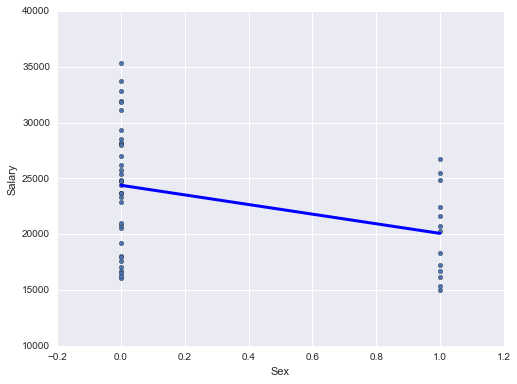

In [23]:
######################## Sex Regression
regression3 = linear_model.LinearRegression()
feature_cols3=['Sex']
x3 = df_new[feature_cols3]
y3 = df_new.Salary
regression3.fit(x3, y3)
print("Linear Regression of Sex coefficient is ", regression3.coef_, " The intercept is ", regression3.intercept_, 
      "The R^^2 is ", regression3.score(x3, y3))
df_new.plot(kind='scatter', x='Sex', y='Salary', figsize=(8,6))
plt.plot(x3, regression3.predict(x3), color='blue', linewidth=3)
plt.show()

Linear Regression of Rank coefficient is  [ 5526.33333333]  The intercept is  12208.9933333 The R^^2 is  0.779302255029


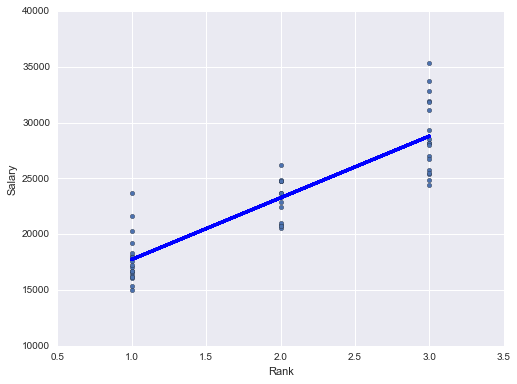

In [24]:
######################## Rank Regression
regression4 = linear_model.LinearRegression()
feature_cols4=['Rank']
x4 = df_new[feature_cols4]
y4 = df_new.Salary
regression4.fit(x4, y4)
print("Linear Regression of Rank coefficient is ", regression4.coef_, " The intercept is ", regression4.intercept_, 
      "The R^^2 is ", regression4.score(x4, y4))
df_new.plot(kind='scatter', x='Rank', y='Salary', figsize=(8,6))
plt.plot(x4, regression4.predict(x4), color='blue', linewidth=3)
plt.show()

Linear Regression of Year coefficient is  [ 752.13255708]  The intercept is  17906.4761936 The R^^2 is  0.494515311883


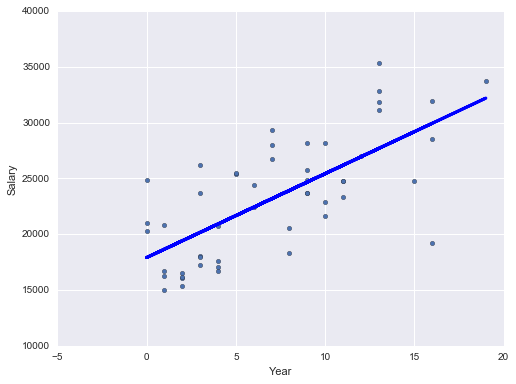

In [25]:
######################## Year Regression
regression5 = linear_model.LinearRegression()
feature_cols5=['Year']
x5 = df_new[feature_cols5]
y5 = df_new.Salary
regression5.fit(x5, y5)
print("Linear Regression of Year coefficient is ", regression5.coef_, " The intercept is ", regression5.intercept_, 
      "The R^^2 is ", regression5.score(x5, y5))
df_new.plot(kind='scatter', x='Year', y='Salary', figsize=(8,6))
plt.plot(x5, regression5.predict(x5), color='blue', linewidth=3)
plt.show()

Linear Regression of Year coefficient is  [-1714.94097222]  The intercept is  24359.2222222 The R^^2 is  0.024014862827


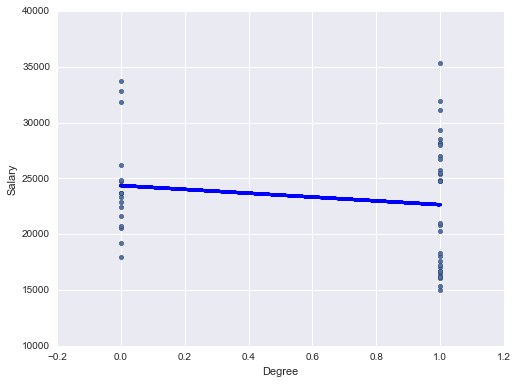

In [26]:
######################## Degree Regression
regression6 = linear_model.LinearRegression()
feature_cols6=['Degree']
x6 = df_new[feature_cols6]
y6 = df_new.Salary
regression6.fit(x6, y6)
print("Linear Regression of Year coefficient is ", regression6.coef_, " The intercept is ", regression6.intercept_, 
      "The R^^2 is ", regression6.score(x6, y6))
df_new.plot(kind='scatter', x='Degree', y='Salary', figsize=(8,6))
plt.plot(x6, regression6.predict(x6), color='blue', linewidth=3)
plt.show()

Linear Regression of Year coefficient is  [ 350.91415348]  The intercept is  17794.4174887 The R^^2 is  0.427354640481


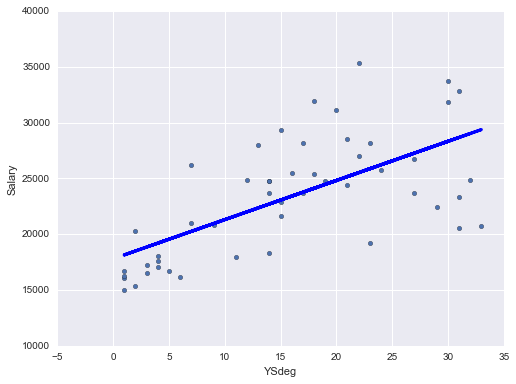

In [22]:
######################## YSdeg Regression
regression7 = linear_model.LinearRegression()
feature_cols7=['YSdeg']
x7 = df_new[feature_cols7]
y7 = df_new.Salary
regression7.fit(x7, y7)
print("Linear Regression of Year coefficient is ", regression7.coef_, " The intercept is ", regression7.intercept_, 
      "The R^^2 is ", regression7.score(x7, y7))
df_new.plot(kind='scatter', x='YSdeg', y='Salary', figsize=(8,6))
plt.plot(x7, regression7.predict(x7), color='blue', linewidth=3)
plt.show()

## Columns with the best $R^2$ score.

The highest $R^2$ value is from the merged Linear Regression, although the results are a litte unexpected... 

    Merged Regression Linear Regression coefficient is  [  338.82862064  5457.41310168   445.33096868 -2030.25528702  -155.99557887]  The intercept is  12817.7563607 The $R^2$ is  0.890881310846
    
As a women, you should be earning an additional 338 more than a man, however when we regress by individual columns, against, it shows that women should be earning 4300 less, however the R^^2 is not related at all.

    Linear Regression of Sex coefficient is  [-4308.37629938]  The intercept is 24381.8378378 The $R^2$ is  0.126570240945
    

## Does sex affect wages? 

Yes. Please see reference (Sex Regression)[http://localhost:8888/notebooks/simple-linear-regression.ipynb#Linear-regression-equation-for-this-data-using-columns-1-5-to-column-6.] 